# Polynomial curve (over)fitting demo

This simple educational tutorial demonstrates some core concepts of supervised machine learning:   what is [**overfitting**](https://en.wikipedia.org/wiki/Overfitting) and how validation helps to avoid it. 

In this demo we machine-learn a very simple "hidden law" – one period of a sine function – from a noisy data using a very simple model – a 1D [polynomial](https://en.wikipedia.org/wiki/Polynomial). 

The demo is inspired by an Exercise 1.1 in Christopher Bishop's book "Pattern Recognition and Machine Learning", 2006.

This is an executable [Python](http://python.org/) [notebook](http://jupyter.org/) originally published in [mantas.info/learn/curve-over-fitting/](https://mantas.info/learn/curve-over-fitting/) which you can download, modify and run for yourself. 

© Mantas Lukoševičius 2017-2022 [mantas.info](http://mantas.info/). 

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a>

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

Import needed libs:

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

## Generate data

The hidden law we are trying to learn is $y=f(x)=\sin(2\pi x)$ for $x \in [0,1]$. 

In [2]:
hidden_law = np.vectorize(lambda x: math.sin(2*math.pi*x))  # made to run on vectors
x_all = np.arange(0, 1, 0.01)

Peek how it looks like. In real life this is not possible.

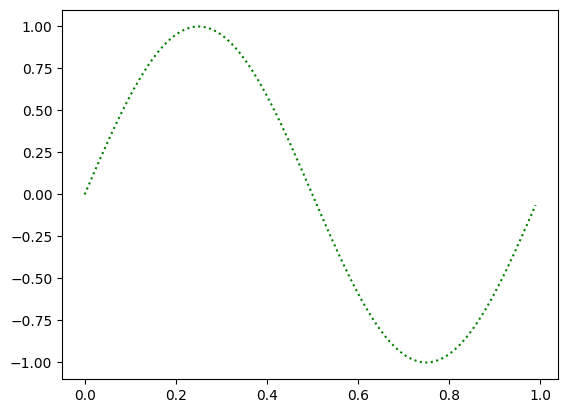

In [3]:
y_hidden = hidden_law(x_all)
plt.plot(x_all, y_hidden, ':g');

Generate same noisy data (observations) from the hidden law. Yeah, the world is not perfect. This is all we will use to learn the hidden law.

In [4]:
np.random.seed(42)  # to make repeatable
noiseLevel = 0.2
x = np.random.rand(20)
y = hidden_law(x) + noiseLevel*np.random.randn(20)

Split the data 10:10 for training and validation.

In [5]:
x_train = x[:10]
y_train = y[:10]
x_valid = x[10:]
y_valid = y[10:]

Plot the data.

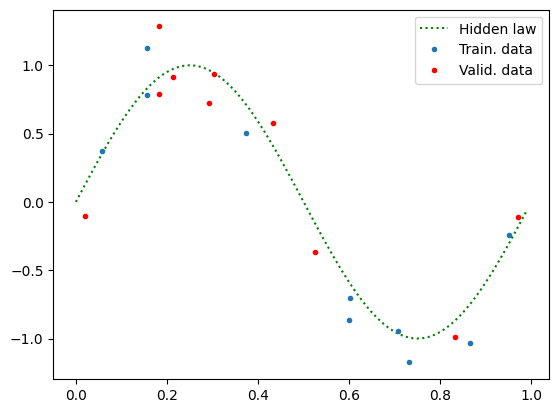

In [6]:
plt.plot(x_all, y_hidden, ':g')
plt.plot(x_train, y_train, '.')
plt.plot(x_valid, y_valid, 'r.')
plt.legend(['Hidden law', 'Train. data', 'Valid. data']);

## Learn
We will learn [polynomials](https://en.wikipedia.org/wiki/Polynomial) $y=f(x,\mathbf{w})=\sum_{i=0}^n w_i x^i$ of different [degrees](https://en.wikipedia.org/wiki/Degree_of_a_polynomial) $n$. 

Define the range of degrees $n$. $n$ here is a [hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) of our model, defining its expressive power.

In [7]:
maxPolyDegree = 10
polyDegrees = range(maxPolyDegree)

In [8]:
list(polyDegrees)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Learn all the different polynomials. A learned polynomial is defined by its parameter (weight) vector $\mathbf{w}$.

In [9]:
polys = []
for polyDegree in polyDegrees:
    polys.append(np.polyfit(x_train, y_train, polyDegree))

See weights of the first three.

In [10]:
polys[:3]

[array([-0.21700967]),
 array([-2.1734858 ,  0.91350014]),
 array([ 2.95148537, -5.04705926,  1.34462422])]

## Evaluate
Compute training and validation (root mean square) errors for the different polynomials.

In [11]:
trainRMSEs = np.zeros(maxPolyDegree)
validRMSEs = np.zeros(maxPolyDegree)
for polyDegree in polyDegrees:
    y_train_p = np.polyval(polys[polyDegree], x_train)
    trainRMSEs[polyDegree] = np.sqrt(np.mean(np.square(y_train_p - y_train)))
    y_valid_p = np.polyval(polys[polyDegree], x_valid)
    validRMSEs[polyDegree] = np.sqrt(np.mean(np.square(y_valid_p - y_valid)))

Plot training and validation errors vs. polynomial degree.

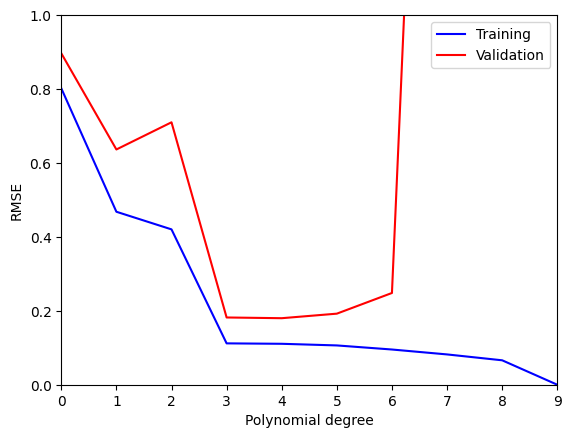

In [12]:
plt.plot(polyDegrees, trainRMSEs, 'b')
plt.plot(polyDegrees, validRMSEs, 'r')
plt.axis((0, maxPolyDegree-1, 0, 1))
plt.legend(['Training', 'Validation'])
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE');

We see that the 4th order polynomial is the optimal one. Going for the higher degrees we get overfitting: the validation error starts to increase from that point even as training error continues to approach zero. The 9th degree polinomial learns the training data perfectly (goes through the 10 training points) but the validation error is huge:

In [13]:
validRMSEs[9]

1350.8736315634178

## Visualize
Let's see what all the different polynomials actually look like:

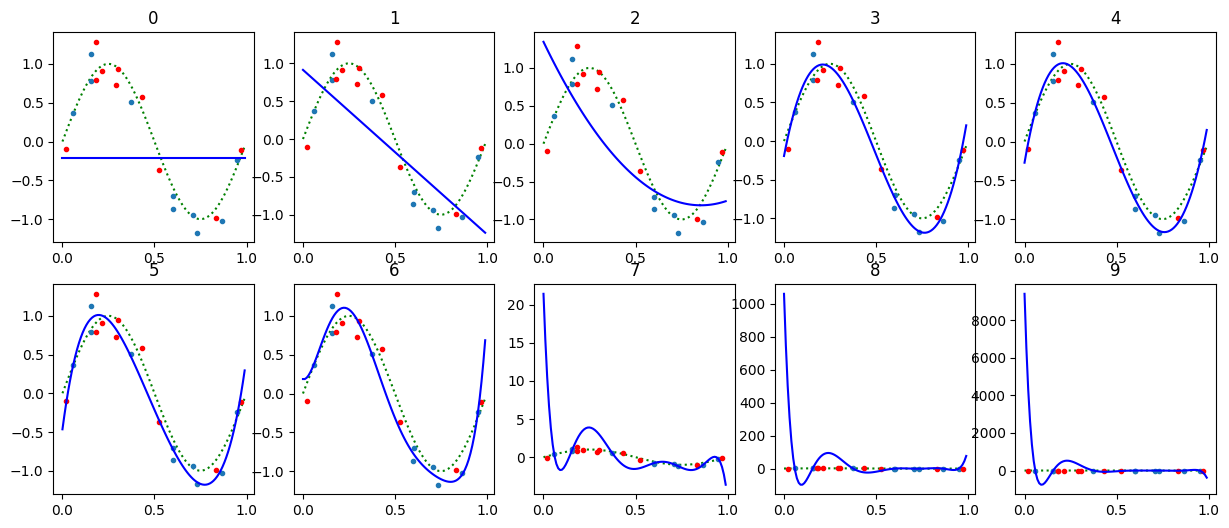

In [14]:
plt.figure(figsize=(15, 6))
for polyDegree in polyDegrees:
    plt.subplot(2, 5, polyDegree+1)
    y_pol = np.polyval(polys[polyDegree], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_valid, y_valid, 'r.')
    plt.plot(x_all, y_pol, 'b')
    plt.title(polyDegree)
    # plt.axis((0, 1, -1.5, 1.5))

We see that indeed polynomials of degrees 3-5 (-6) that have the lowest validation errors give the closest match to the hidden law we are trying to model. 

## Conclusion

**Validation is a good way to select the model (meta-parameters) even if both training and validation data are not perfect.** 

You can play with the code, e.g., be changing `noiseLevel`, numbers of point for training and testing, the function to learn, etc. and see how that affects the results.